In [1]:
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

In [19]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 29857 x 22475 and n_cells x n_regions = 29857 x 450312
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_cell:'batch', 'sample_id', 'Refined_cell_type', 'Leiden_res0.6', 'Leiden_res0.8', 'Leiden_res1.0', 'Leiden_res1.2', 'Leiden_res1.5', 'Leiden_res2.0', 'Zonation_refined_cell_type'
	menr:'CTX_DARs_All_cluster_db', 'CTX_DARs_No_promoters_cluster_db', 'CTX_Topics_All_cluster_db', 'CTX_Topics_No_promoters_cluster_db', 'CTX_Clean-topics_All_cluster_db', 'CTX_Clean-topics_No_promoters_cluster_db', 'CTX_MACS-bdgdiff_All_cluster_db', 'CTX_MACS-bdgdiff_No_promoters_cluster_db', 'CTX_DARs_All_all_motifs_db', 'CTX_DARs_No_promoters_all_motifs_db', 'CTX_Topics_All_all_motifs_db', 'CTX_Topics_No_promoters_all_motifs_db', 'CTX_Clean-topics_All_all_motifs_db', 'CTX_Clean-topics_No_promoters_all_motifs_db', 'CTX_MACS-bdgdiff_All_all_motifs_db', 'CTX_MACS-bdgdi

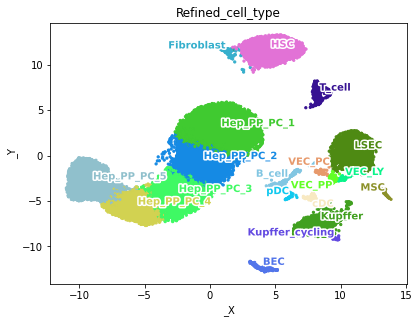

In [5]:
from scenicplus.dimensionality_reduction import *
plot_metadata(scplus_obj,
                 reduction_name='HVG UMAP',
                 variables=['Refined_cell_type'],
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

In [15]:
color_dict_liver = {'B_cell': "#F8766D",
                   'BEC':"#E9842C",
                   'cDC':"#D69100",
                   'Fibroblast':"#BC9D00",
                   'Hep_PP_PC_1': "#9CA700",
                   'Hep_PP_PC_2' : "#6FB000",
                   'Hep_PP_PC_3' :  "#00B813",
                   'Hep_PP_PC_4' : "#00BD61",
                   'Hep_PP_PC_5' : "#00C08E",
                   'HSC' : "#00C0B4", 
                   'Kupffer' : "#00BDD4",
                   'Kupffer_cycling' : "#00B5EE",
                   'LSEC' : "#00A7FF",
                   'MSC' : "#7F96FF",
                   'pDC' : "#BC81FF",
                   'T_cell' : "#E26EF7",
                   'VEC_LY' :  "#F863DF",
                   'VEC_PC' : "#FF62BF",
                   'VEC_PP' : "#FF6A9A"}

In [10]:
from pycisTopic.diff_features import find_highly_variable_features
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))].T, n_top_features = 200, plot = False)

2022-10-06 10:40:40,127 cisTopic     INFO     Calculating mean
2022-10-06 10:40:40,267 cisTopic     INFO     Calculating variance
2022-10-06 10:40:41,638 cisTopic     INFO     Done!


<Figure size 432x288 with 0 Axes>

2022-10-06 10:40:42,926 perturbation INFO     Caclulating perturbation matrix for: {'Tbx3': 0} over 5 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [05:57<00:00,  1.80s/it]


2022-10-06 10:48:40,818 perturbation INFO     Generating ranking based on perturbed matrix.
2022-10-06 10:50:06,827 perturbation INFO     Scoring eRegulons.
2022-10-06 10:52:55,071 perturbation INFO     Projecting perturbation effect in embedding: HVG UMAP


/opt/venv/lib/python3.8/site-packages/scenicplus/simulation.py:292: RuntimeWarning: invalid value encountered in true_divide
  unitary_vectors /= np.linalg.norm(unitary_vectors, ord=2, axis=0)  # divide by L2


2022-10-06 10:55:38,808 perturbation INFO     Calculating grid of arrows
2022-10-06 10:55:38,923 perturbation INFO     Plotting


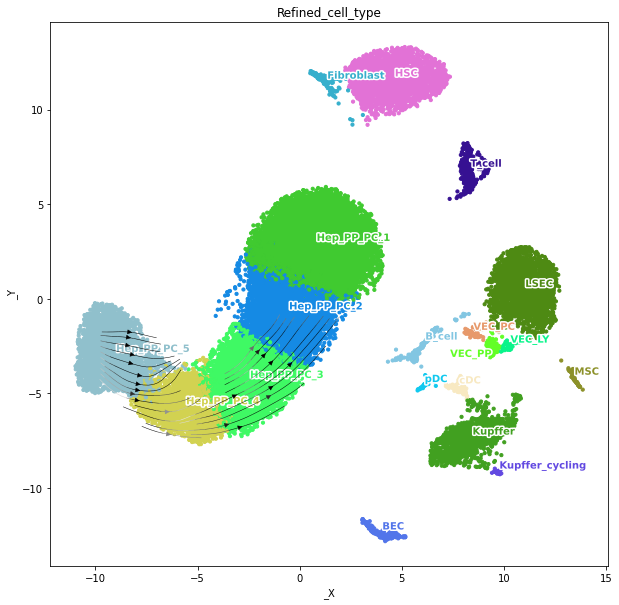

In [11]:
from scenicplus.simulation import plot_perturbation_effect_in_embedding
import seaborn as sns
_ = plot_perturbation_effect_in_embedding(
        scplus_obj = scplus_obj,
        reduction_name = 'HVG UMAP',
        n_cpu = 8,
        perturbation = {'Tbx3': 0}, #specifies that we want to set the expression of SOX10 to 0 in all cells.
        variable = 'Refined_cell_type',
        color_dictionary = {'Refined_cell_type': color_dict_liver},
        genes_to_use = hvg,
        figsize = (10, 10))

2022-10-06 11:10:01,949 perturbation INFO     Caclulating perturbation matrix for: {'Tcf7l1': 0} over 5 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [06:44<00:00,  2.03s/it]


2022-10-06 11:21:46,151 perturbation INFO     Generating ranking based on perturbed matrix.
2022-10-06 11:23:21,683 perturbation INFO     Scoring eRegulons.
2022-10-06 11:24:53,580 perturbation INFO     Projecting perturbation effect in embedding: HVG UMAP


/opt/venv/lib/python3.8/site-packages/scenicplus/simulation.py:292: RuntimeWarning: invalid value encountered in true_divide
  unitary_vectors /= np.linalg.norm(unitary_vectors, ord=2, axis=0)  # divide by L2


2022-10-06 11:27:42,215 perturbation INFO     Calculating grid of arrows
2022-10-06 11:27:42,325 perturbation INFO     Plotting


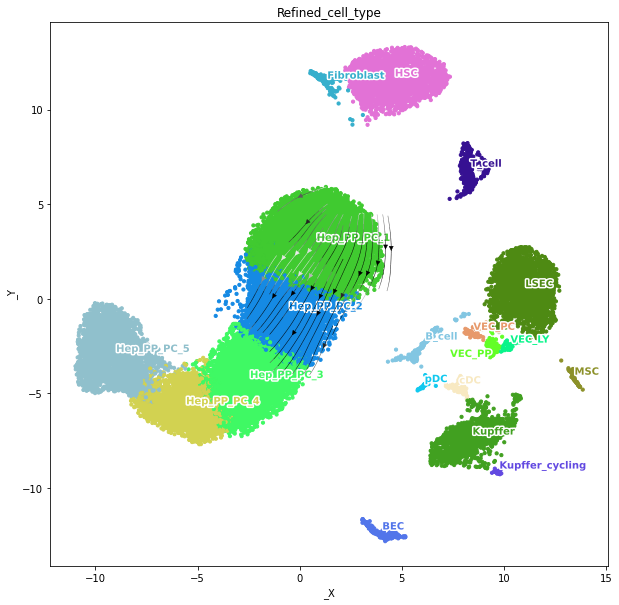

In [13]:
from scenicplus.simulation import plot_perturbation_effect_in_embedding
import seaborn as sns
_ = plot_perturbation_effect_in_embedding(
        scplus_obj = scplus_obj,
        reduction_name = 'HVG UMAP',
        n_cpu = 8,
        perturbation = {'Tcf7l1': 0}, #specifies that we want to set the expression of SOX10 to 0 in all cells.
        variable = 'Refined_cell_type',
        #color_dictionary = {'MMline': color_dict_line},
        color_dictionary = {'Refined_cell_type': color_dict_liver},
        genes_to_use = hvg,
        figsize = (10, 10))

In [ ]:
from scenicplus.simulation import plot_perturbation_effect_in_embedding
import seaborn as sns
_ = plot_perturbation_effect_in_embedding(
        scplus_obj = scplus_obj,
        reduction_name = 'HVG UMAP',
        n_cpu = 8,
        perturbation = {'Hnf4a': 0}, #specifies that we want to set the expression of SOX10 to 0 in all cells.
        variable = 'Refined_cell_type',
        color_dictionary = {'Refined_cell_type': color_dict_liver},
        genes_to_use = hvg,
        figsize = (10, 10))

2022-10-06 11:29:35,042 perturbation INFO     Caclulating perturbation matrix for: {'Hnf4a': 0} over 5 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [06:05<00:00,  1.84s/it]


2022-10-06 11:40:38,167 perturbation INFO     Generating ranking based on perturbed matrix.
2022-10-06 11:42:13,727 perturbation INFO     Scoring eRegulons.


## Step -by-step KD

In [ ]:
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

In [ ]:
from pycisTopic.diff_features import find_highly_variable_features
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))].T, n_top_features = 200, plot = False)

In [ ]:
hvg = list(set(hvg + ['Tbx3', 'Tcf7l1', 'Hnf4a', 'Cebpa', 'Foxa1', 'Onecut1', 'Tcf7l2', 'Cyp2e1', 'Hal', 'Cdh1', 'Aspg', 'Ass1', 'Arg1', 'Dlgap1', 'Pck1', 'Plxna2', 'Axin2', 'Gne', 'Gulo', 'Nt5e']))

In [18]:
# Run in genius
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

from pycisTopic.diff_features import find_highly_variable_features
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))].T, n_top_features = 200, plot = False)

hvg = list(set(hvg + ['Tbx3', 'Tcf7l1', 'Hnf4a', 'Cebpa', 'Foxa1', 'Onecut1', 'Tcf7l2', 'Cyp2e1', 'Hal', 'Cdh1', 'Aspg', 'Ass1', 'Arg1', 'Dlgap1', 'Pck1', 'Plxna2', 'Axin2', 'Gne', 'Gulo', 'Nt5e']))

perturb_list=[{'Tbx3': 0},
              {'Tcf7l1': 0},
              {'Hnf4a': 0},
              {'Hnf1a': 0},
              {'Foxa1': 0},
              {'Cebpa': 0},
              {'Onecut1': 0},
              {'Tcf7l2': 0}]
perturbed_matrix_dict={}

from scenicplus.simulation import *
for e in range(len(perturb_list)):
    k = list(perturb_list[e].keys())[0]
    perturbed_matrix_dict[k] = simulate_perturbation(
            scplus_obj = scplus_obj,
            perturbation = perturb_list[e], 
            eRegulon_metadata_key = 'eRegulon_metadata',
            n_iter = 10, 
            regressors = None, 
            genes = hvg, 
            regressor_type = 'GBM',
            regressor_kwargs = None, 
            eRegulons_to_use = None, 
            keep_intermediate = True)
    
sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['11']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_KD_last_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)

sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['6']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_KD_5th_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)


for k in perturbed_matrix_dict.keys():
    for i in perturbed_matrix_dict[k].keys():
        perturbed_matrix_dict[k][i] = perturbed_matrix_dict[k][i].loc[:,hvg]

# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_only_hvg_KD.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

from scenicplus.eregulon_enrichment import *
perturbed_matrix_dict = {}
for k in sel_mat.keys():
    perturbed_matrix = sel_mat[k] 
    perturbed_ranking = _make_rankings(perturbed_matrix)
    perturbed_matrix_dict[k] = score_eRegulons(
            scplus_obj = scplus_obj,
            ranking = perturbed_ranking,
            eRegulon_signatures_key = 'eRegulon_signatures',
            enrichment_type = 'gene',
            inplace = False,
            n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_score_regulons_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

delta_embedding_dict={}
for k in perturbed_matrix_dict.keys():
    delta_embedding_dict[k] = _project_perturbation_in_embedding(
        scplus_obj = scplus_obj, 
        original_matrix = scplus_obj.uns['eRegulon_AUC']['Gene_based'], 
        perturbed_matrix = perturbed_matrix_dict[k], 
        reduction_name = 'HVG UMAP', 
        sigma_corr = 0.05, 
        n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/delta_embedding_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(delta_embedding_dict, f)


embedding = scplus_obj.dr_cell['HVG UMAP'].to_numpy()
grid_xy={}
uv={}
mask={}
distances={}
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in delta_embedding_dict.keys():
    grid_xy[k], uv[k], mask[k] = _calculate_grid_arrows(
        embedding=embedding, 
        delta_embedding=delta_embedding_dict[k],
        offset_frac=grid_offset_frac,
        n_grid_cols=grid_n_cols,
        n_grid_rows=grid_n_rows,
        n_neighbors=grid_n_neighbors,
        n_cpu=n_cpu)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/grid_xy_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(grid_xy, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/uv_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(uv, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/mask_5th_iteration_KD.pkl', 'wb') as f:
  pickle.dump(mask, f)

Tbx3
Tcf7l1
Hnf4a
Hnf1a
Foxa1
Cebpa
Onecut1
Tcf7l2


In [1]:
# Load data
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

In [56]:
# Load grid data
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/grid_xy_5th_iteration_KD.pkl', 'rb')
grid_xy_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/uv_5th_iteration_KD.pkl', 'rb')
uv_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/mask_5th_iteration_KD.pkl', 'rb')
mask_dict = dill.load(infile)
infile.close()

In [57]:
color_dict_liver = {'B_cell': "#F8766D",
                   'BEC':"#E9842C",
                   'cDC':"#D69100",
                   'Fibroblast':"#BC9D00",
                   'Hep_PP_PC_1': "#9CA700",
                   'Hep_PP_PC_2' : "#6FB000",
                   'Hep_PP_PC_3' :  "#00B813",
                   'Hep_PP_PC_4' : "#00BD61",
                   'Hep_PP_PC_5' : "#00C08E",
                   'HSC' : "#00C0B4", 
                   'Kupffer' : "#00BDD4",
                   'Kupffer_cycling' : "#00B5EE",
                   'LSEC' : "#00A7FF",
                   'MSC' : "#7F96FF",
                   'pDC' : "#BC81FF",
                   'T_cell' : "#E26EF7",
                   'VEC_LY' :  "#F863DF",
                   'VEC_PC' : "#FF62BF",
                   'VEC_PP' : "#FF6A9A"}

Tbx3


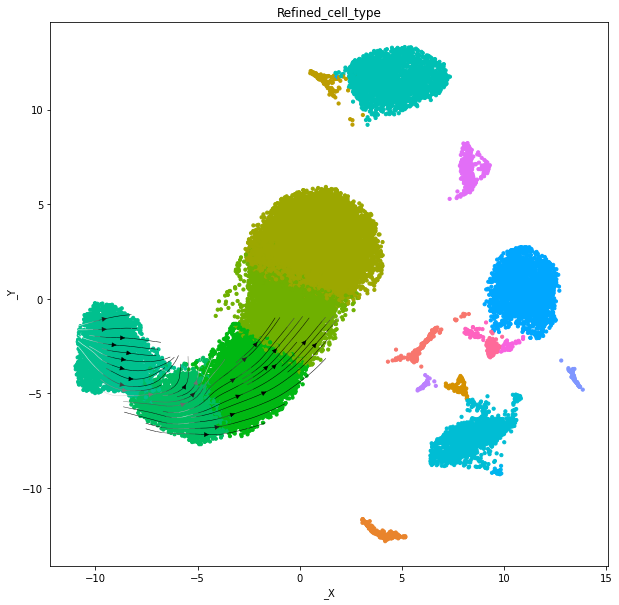

Tcf7l1


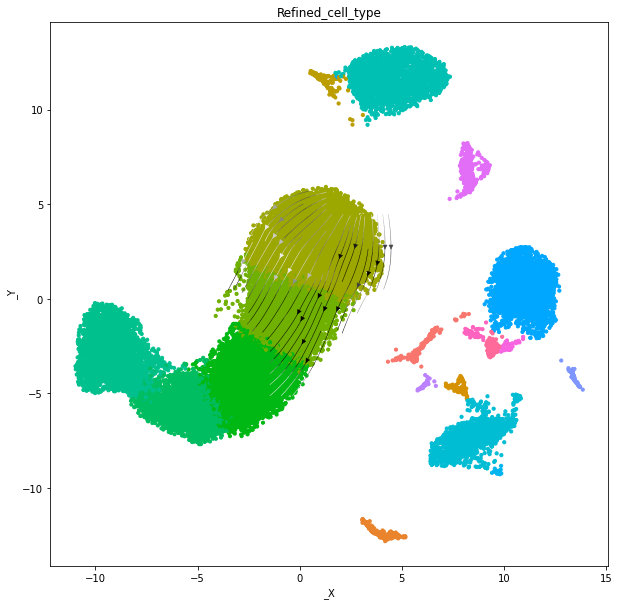

Hnf4a


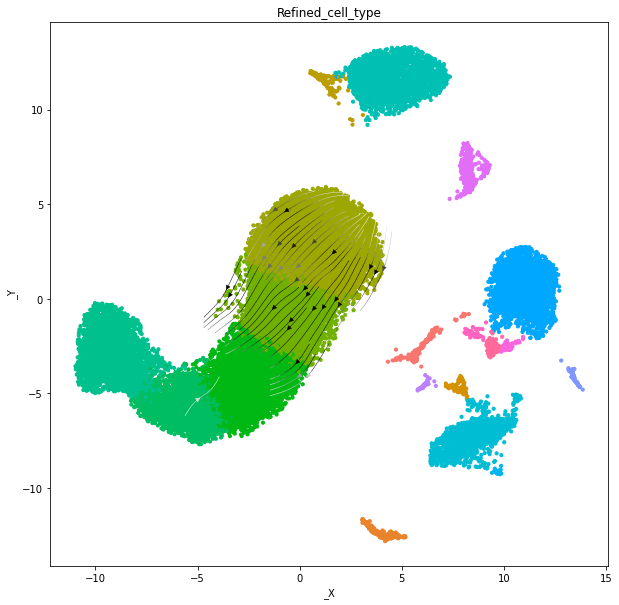

Hnf1a


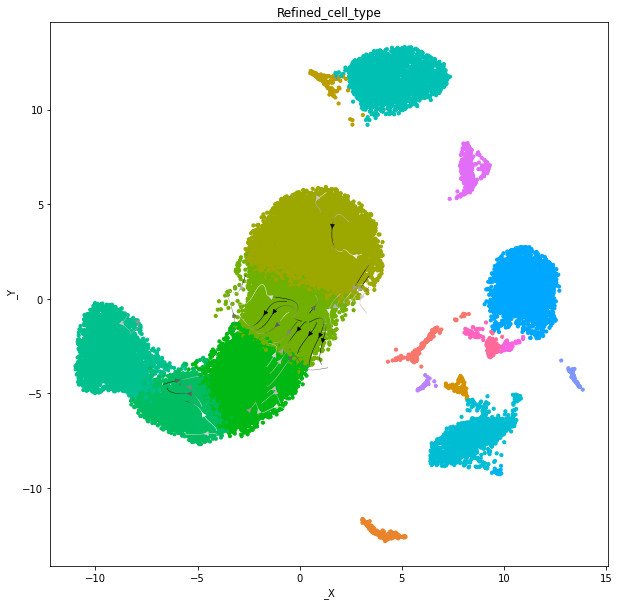

Foxa1


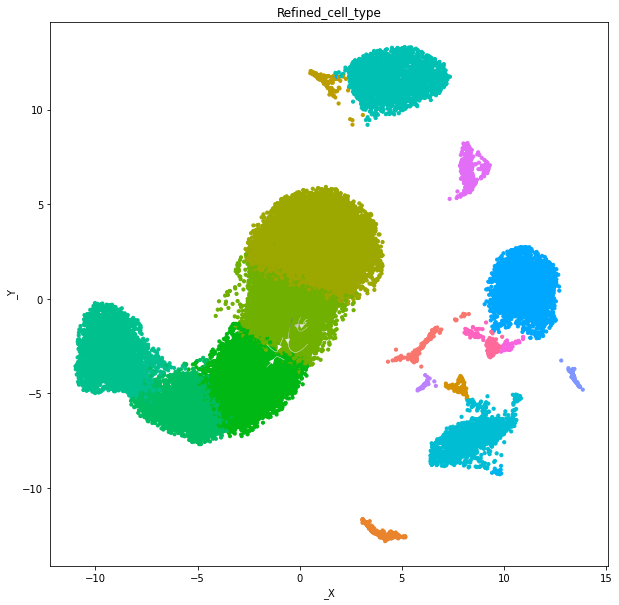

Cebpa


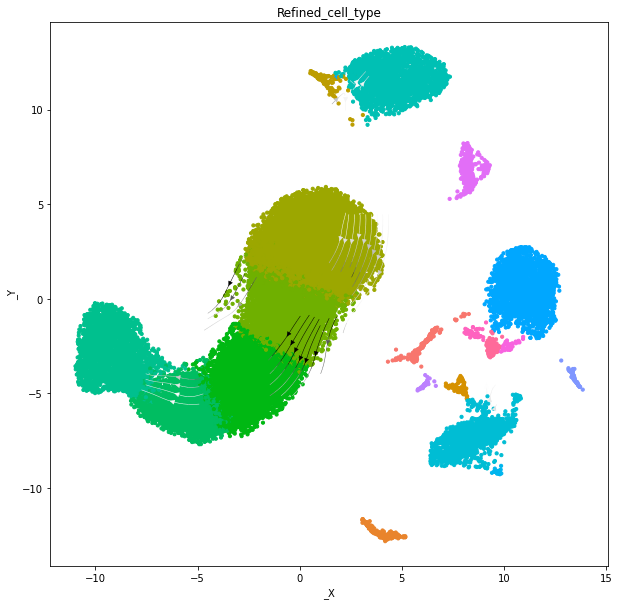

Onecut1


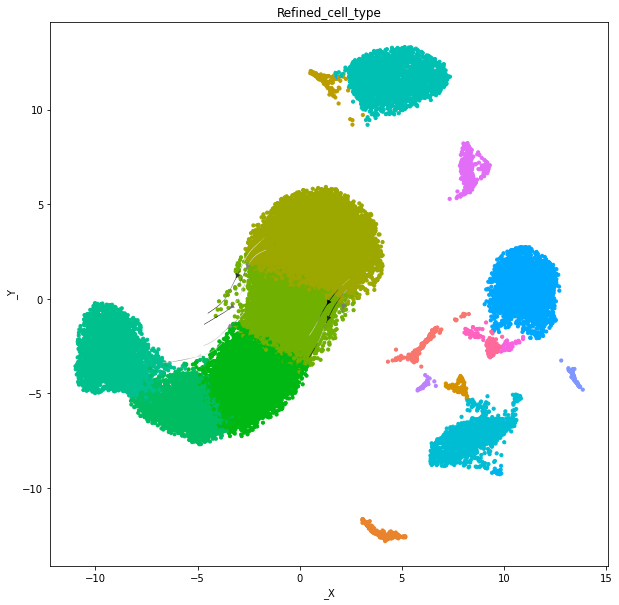

Tcf7l2


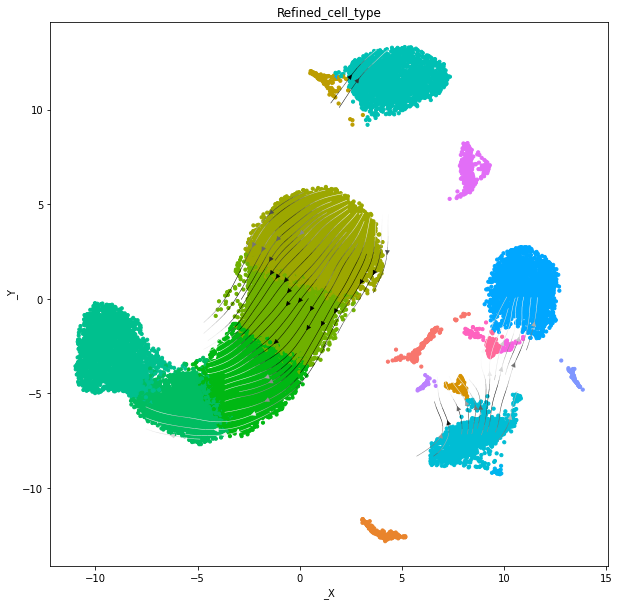

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in grid_xy_dict.keys():
    print(k)
    grid_xy = grid_xy_dict[k].copy() 
    uv = uv_dict[k].copy()
    mask = mask_dict[k].copy()
    distances = np.sqrt((uv**2).sum(1))
    norm = matplotlib.colors.Normalize(vmin=0.15, vmax=0.5, clip=True)
    scale = lambda X: [(x - min(X)) / (max(X) - min(X)) for x in X]
    uv[np.logical_or(~mask, np.array(scale(distances)) < 0.1)] = np.nan
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.title(k)
    ax = plot_metadata_given_ax(
        scplus_obj=scplus_obj,
        reduction_name='HVG UMAP',
        ax = ax,
        variable = 'Refined_cell_type',
        show_label = False,
        color_dictionary =  {'Refined_cell_type': color_dict_liver})
    ax.streamplot(
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1], 
            density = 3, 
            color = np.array(scale(distances)).reshape(grid_n_cols, grid_n_rows),
            cmap = 'Greys', 
            zorder = 10, 
            norm = norm,
            linewidth = 0.5)
    plt.show()

Tbx3
Tcf7l1


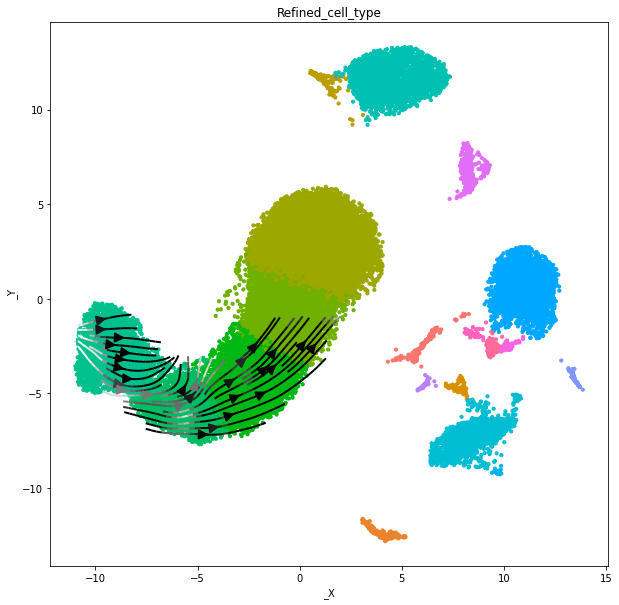

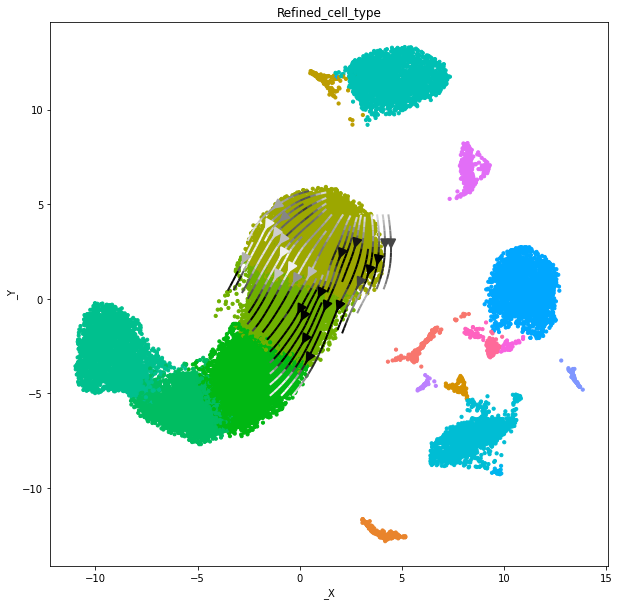

In [58]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in ['Tbx3', 'Tcf7l1']:
    print(k)
    grid_xy = grid_xy_dict[k].copy() 
    uv = uv_dict[k].copy()
    mask = mask_dict[k].copy()
    distances = np.sqrt((uv**2).sum(1))
    norm = matplotlib.colors.Normalize(vmin=0.15, vmax=0.5, clip=True)
    scale = lambda X: [(x - min(X)) / (max(X) - min(X)) for x in X]
    uv[np.logical_or(~mask, np.array(scale(distances)) < 0.1)] = np.nan
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.title(k)
    ax = plot_metadata_given_ax(
        scplus_obj=scplus_obj,
        reduction_name='HVG UMAP',
        ax = ax,
        variable = 'Refined_cell_type',
        show_label = False,
        color_dictionary =  {'Refined_cell_type': color_dict_liver})
    ax.streamplot(
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1], 
            density = 3, 
            color = np.array(scale(distances)).reshape(grid_n_cols, grid_n_rows),
            cmap = 'Greys', 
            zorder = 10, 
            norm = norm,
            linewidth = 2,
            arrowsize=2)
    #plt.show()
    plt.savefig('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/KD_'+k+'.pdf')

# Test overexpression

In [2]:
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

from pycisTopic.diff_features import find_highly_variable_features
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))].T, n_top_features = 200, plot = False)

hvg = list(set(hvg + ['Tbx3', 'Tcf7l1', 'Hnf4a', 'Cebpa', 'Foxa1', 'Onecut1', 'Tcf7l2', 'Cyp2e1', 'Hal', 'Cdh1', 'Aspg', 'Ass1', 'Arg1', 'Dlgap1', 'Pck1', 'Plxna2', 'Axin2', 'Gne', 'Gulo', 'Nt5e']))


KeyboardInterrupt



In [76]:
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

from pycisTopic.diff_features import find_highly_variable_features
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))].T, n_top_features = 200, plot = False)

hvg = list(set(hvg + ['Tbx3', 'Tcf7l1', 'Hnf4a', 'Cebpa', 'Foxa1', 'Onecut1', 'Tcf7l2', 'Cyp2e1', 'Hal', 'Cdh1', 'Aspg', 'Ass1', 'Arg1', 'Dlgap1', 'Pck1', 'Plxna2', 'Axin2', 'Gne', 'Gulo', 'Nt5e']))

from scenicplus.simulation import *
perturbed_matrix_dict = {}
for TF in ['Tbx3', 'Tcf7l1', 'Foxa1', 'Cebpa', 'Onecut1', 'Hnf4a', 'Hnf1a', 'Tcf7l2']:
    x = scplus_obj.to_df('EXP')[TF].copy()
    val = max(x)
    hep_cells = scplus_obj.metadata_cell[scplus_obj.metadata_cell.Refined_cell_type.str.contains('Hep')].index.tolist()
    x[hep_cells] = val
    x = x.tolist()
    perturbation = {TF: x}
    perturbed_matrix_dict[TF] = simulate_perturbation(
                scplus_obj = scplus_obj,
                perturbation = perturbation, 
                eRegulon_metadata_key = 'eRegulon_metadata',
                n_iter = 10, 
                regressors = None, 
                genes = hvg, 
                regressor_type = 'GBM',
                regressor_kwargs = None, 
                eRegulons_to_use = None, 
                keep_intermediate = True)

sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['11']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_OE_last_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)

sel_mat = {}
for k in perturbed_matrix_dict.keys():
    sel_mat[k] =  perturbed_matrix_dict[k]['6']
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_OE_5th_iter.pkl', 'wb') as f:
  pickle.dump(sel_mat, f)


for k in perturbed_matrix_dict.keys():
    for i in perturbed_matrix_dict[k].keys():
        perturbed_matrix_dict[k][i] = perturbed_matrix_dict[k][i].loc[:,hvg]

# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_only_hvg_OE.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

from scenicplus.eregulon_enrichment import *
perturbed_matrix_dict = {}
for k in sel_mat.keys():
    perturbed_matrix = sel_mat[k] 
    perturbed_ranking = _make_rankings(perturbed_matrix)
    perturbed_matrix_dict[k] = score_eRegulons(
            scplus_obj = scplus_obj,
            ranking = perturbed_ranking,
            eRegulon_signatures_key = 'eRegulon_signatures',
            enrichment_type = 'gene',
            inplace = False,
            n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_score_regulons_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(perturbed_matrix_dict, f)

delta_embedding_dict={}
for k in perturbed_matrix_dict.keys():
    delta_embedding_dict[k] = _project_perturbation_in_embedding(
        scplus_obj = scplus_obj, 
        original_matrix = scplus_obj.uns['eRegulon_AUC']['Gene_based'], 
        perturbed_matrix = perturbed_matrix_dict[k], 
        reduction_name = 'HVG UMAP', 
        sigma_corr = 0.05, 
        n_cpu = 8)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/delta_embedding_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(delta_embedding_dict, f)

embedding = scplus_obj.dr_cell['HVG UMAP'].to_numpy()
grid_xy={}
uv={}
mask={}
distances={}
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in delta_embedding_dict.keys():
    grid_xy[k], uv[k], mask[k] = _calculate_grid_arrows(
        embedding=embedding, 
        delta_embedding=delta_embedding_dict[k],
        offset_frac=grid_offset_frac,
        n_grid_cols=grid_n_cols,
        n_grid_rows=grid_n_rows,
        n_neighbors=grid_n_neighbors,
        n_cpu=n_cpu)
    
# Save
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/grid_xy_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(grid_xy, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/uv_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(uv, f)
import pickle
with open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/mask_5th_iteration_OE.pkl', 'wb') as f:
  pickle.dump(mask, f)

AAACCCACACCCTAAA-TEW__02ff09__scNuc_Liver_Habib_Control                   5.0
AAACCCACAGACACCC-TEW__02ff09__scNuc_Liver_Habib_Control                   5.0
AAACCCAGTTACCGTA-TEW__02ff09__scNuc_Liver_Habib_Control                  20.0
AAACCCAGTTGTTGAC-TEW__02ff09__scNuc_Liver_Habib_Control                  20.0
AAACCCATCGCATTAG-TEW__02ff09__scNuc_Liver_Habib_Control                   5.0
                                                                         ... 
TTTGTGTTCGCTAAGT-TEW__ebb273__b33e6f__Multiome_Liver_CTRL_NSTprotocol     5.0
TTTGTGTTCGGTTTGG-TEW__ebb273__b33e6f__Multiome_Liver_CTRL_NSTprotocol     5.0
TTTGTGTTCTTTGTAC-TEW__ebb273__b33e6f__Multiome_Liver_CTRL_NSTprotocol     5.0
TTTGTTGGTTACATCC-TEW__ebb273__b33e6f__Multiome_Liver_CTRL_NSTprotocol     5.0
TTTGTTGGTTATTGCC-TEW__ebb273__b33e6f__Multiome_Liver_CTRL_NSTprotocol     5.0
Name: Tbx3, Length: 29857, dtype: float32

In [51]:
# Load grid data
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/grid_xy_5th_iteration_OE.pkl', 'rb')
grid_xy_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/uv_5th_iteration_OE.pkl', 'rb')
uv_dict = dill.load(infile)
infile.close()
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/mask_5th_iteration_OE.pkl', 'rb')
mask_dict = dill.load(infile)
infile.close()

In [52]:
color_dict_liver = {'B_cell': "#F8766D",
                   'BEC':"#E9842C",
                   'cDC':"#D69100",
                   'Fibroblast':"#BC9D00",
                   'Hep_PP_PC_1': "#9CA700",
                   'Hep_PP_PC_2' : "#6FB000",
                   'Hep_PP_PC_3' :  "#00B813",
                   'Hep_PP_PC_4' : "#00BD61",
                   'Hep_PP_PC_5' : "#00C08E",
                   'HSC' : "#00C0B4", 
                   'Kupffer' : "#00BDD4",
                   'Kupffer_cycling' : "#00B5EE",
                   'LSEC' : "#00A7FF",
                   'MSC' : "#7F96FF",
                   'pDC' : "#BC81FF",
                   'T_cell' : "#E26EF7",
                   'VEC_LY' :  "#F863DF",
                   'VEC_PC' : "#FF62BF",
                   'VEC_PP' : "#FF6A9A"}

Tbx3


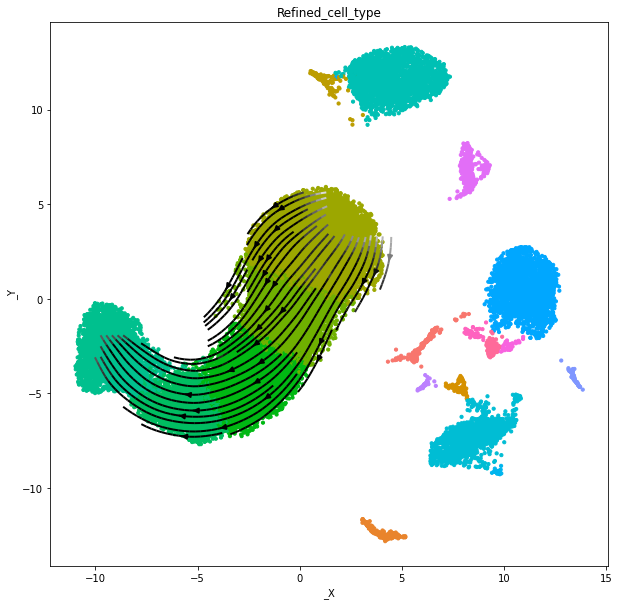

Tcf7l1


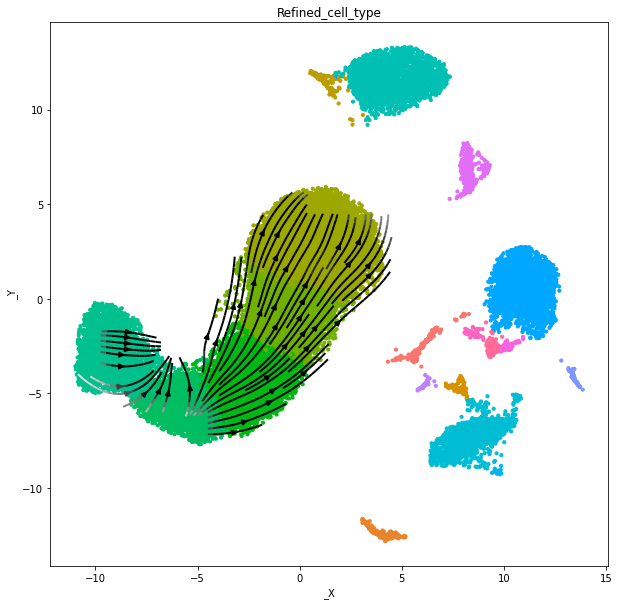

Foxa1


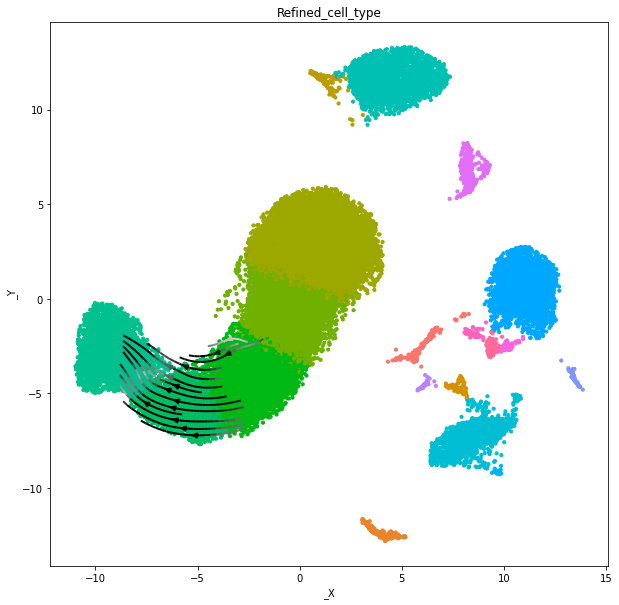

Cebpa


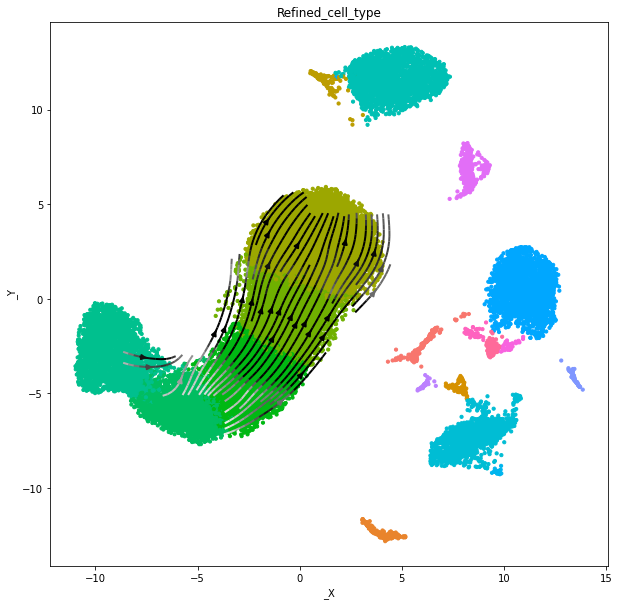

Onecut1


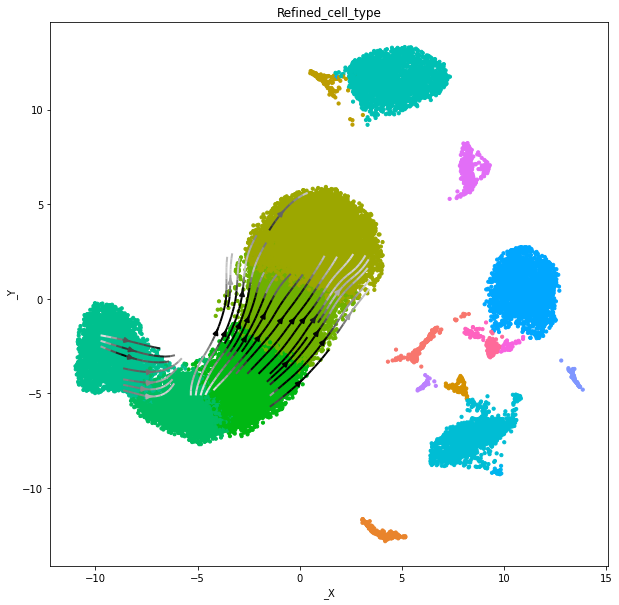

Hnf4a


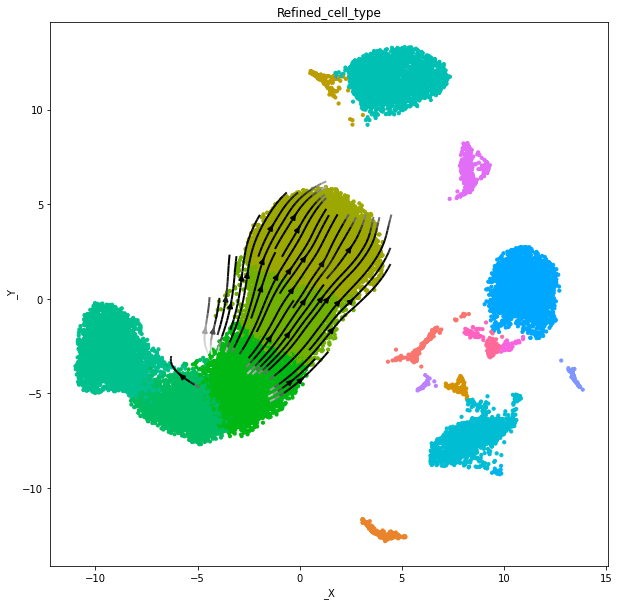

Hnf1a


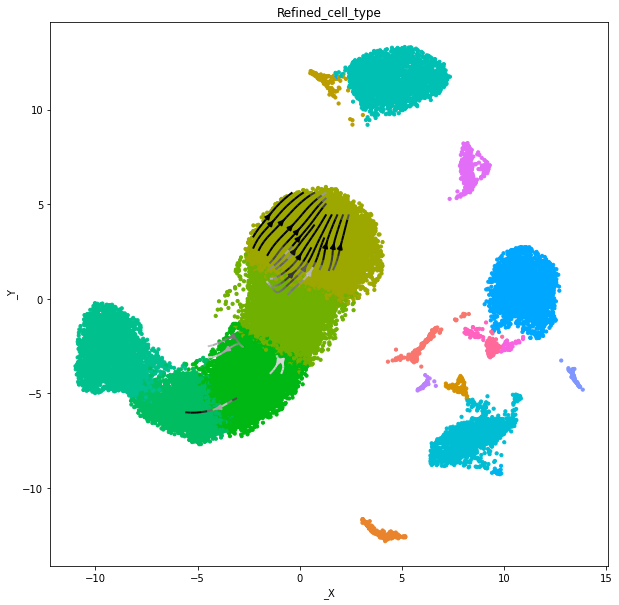

Tcf7l2


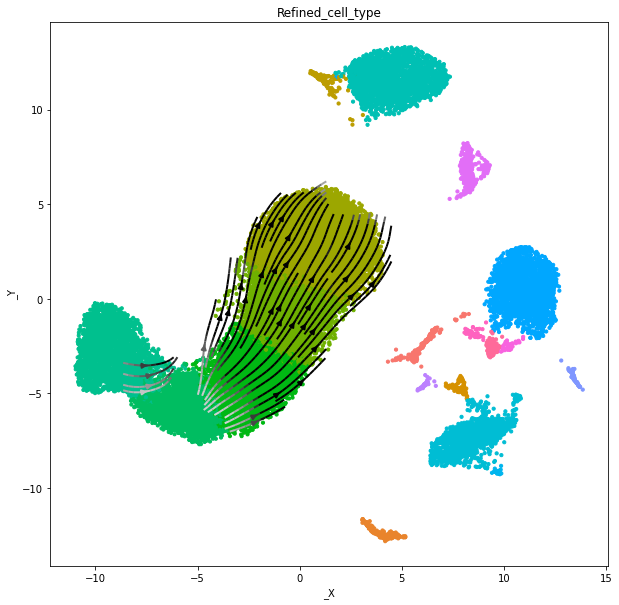

In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in grid_xy_dict.keys():
    print(k)
    grid_xy = grid_xy_dict[k].copy() 
    uv = uv_dict[k].copy()
    mask = mask_dict[k].copy()
    distances = np.sqrt((uv**2).sum(1))
    norm = matplotlib.colors.Normalize(vmin=0.15, vmax=0.5, clip=True)
    scale = lambda X: [(x - min(X)) / (max(X) - min(X)) for x in X]
    uv[np.logical_or(~mask, np.array(scale(distances)) < 0.2)] = np.nan
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.title(k)
    ax = plot_metadata_given_ax(
        scplus_obj=scplus_obj,
        reduction_name='HVG UMAP',
        ax = ax,
        variable = 'Refined_cell_type',
        show_label = False,
        color_dictionary =  {'Refined_cell_type': color_dict_liver})
    ax.streamplot(
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1], 
            density = 3, 
            color = np.array(scale(distances)).reshape(grid_n_cols, grid_n_rows),
            cmap = 'Greys', 
            zorder = 10, 
            norm = norm,
            linewidth = 2)
    plt.show()

Tbx3
Tcf7l1


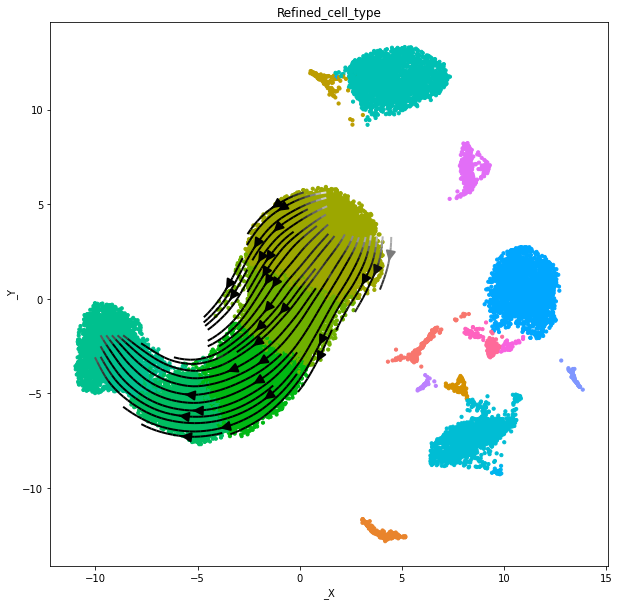

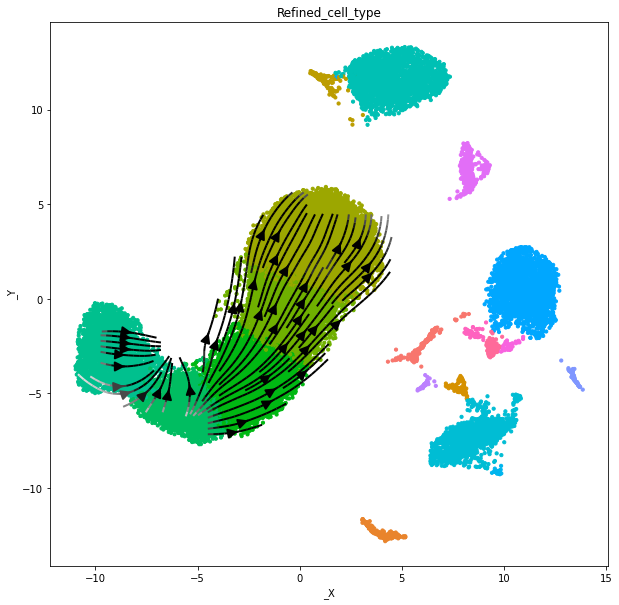

In [55]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
grid_offset_frac = 0.005
grid_n_cols = 25
grid_n_rows = 25
grid_n_neighbors = 25
n_cpu = 8
for k in ['Tbx3', 'Tcf7l1']:
    print(k)
    grid_xy = grid_xy_dict[k].copy() 
    uv = uv_dict[k].copy()
    mask = mask_dict[k].copy()
    distances = np.sqrt((uv**2).sum(1))
    norm = matplotlib.colors.Normalize(vmin=0.15, vmax=0.5, clip=True)
    scale = lambda X: [(x - min(X)) / (max(X) - min(X)) for x in X]
    uv[np.logical_or(~mask, np.array(scale(distances)) < 0.2)] = np.nan
    fig, ax = plt.subplots(figsize=(10,10))
    #plt.title(k)
    ax = plot_metadata_given_ax(
        scplus_obj=scplus_obj,
        reduction_name='HVG UMAP',
        ax = ax,
        variable = 'Refined_cell_type',
        show_label = False,
        color_dictionary =  {'Refined_cell_type': color_dict_liver})
    ax.streamplot(
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            grid_xy.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 0],
            uv.reshape(grid_n_cols,grid_n_rows, 2)[:, :, 1], 
            density = 3, 
            color = np.array(scale(distances)).reshape(grid_n_cols, grid_n_rows),
            cmap = 'Greys', 
            zorder = 10, 
            norm = norm,
            linewidth = 2,
            arrowsize=2)
    #plt.show()
    plt.savefig('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/OE_'+k+'.pdf')

In [2]:
# Plot genes over iterations
## Load data
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_only_hvg_KD.pkl', 'rb')
perturb_matrix_dict = dill.load(infile)
infile.close()

In [36]:
import os
os.chdir('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/')
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/scplus_obj_gene_based.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

In [49]:
hep_cells = scplus_obj.metadata_cell[scplus_obj.metadata_cell.Refined_cell_type.str.contains('Hep_PP_PC_5')].index.tolist()
mat_list = perturb_matrix_dict['Tbx3']
import pandas as pd
x = [mat_list[k].loc[hep_cells].mean() for k in mat_list.keys()]
l = pd.concat(x, axis=1)
l = l.transpose()
l

,G6pc,Col8a1,Sgcz,Lhpp,Hnf4a,Skap1,Cyp2e1,Iigp1,Btbd11,Cacnb2,...,Ebf1,Thrsp,Igf1,Egfem1,Sema6a,Tfpi2,Dnase1l3,Dock2,Adgrv1,Keg1
0,1.065240,0.004757,5.785593,3.984370,1.527013,0.022766,14.328916,0.510703,0.00034,0.007136,...,0.002718,0.733945,2.946313,0.006116,0.004417,1.64458,0.009174,0.003738,1.075433,0.965002
1,1.065240,0.004757,5.785593,3.984370,1.527013,0.022766,14.328916,0.510703,0.00034,0.007136,...,0.002718,0.733945,2.946313,0.006116,0.004417,1.64458,0.009174,0.003738,1.075433,0.965002
2,1.118460,0.004757,5.785593,3.984370,1.527013,0.022766,14.328916,0.510703,0.00034,0.007136,...,0.002718,0.733945,2.946313,0.006116,0.004417,1.64458,0.009174,0.003738,1.075433,0.965002
3,1.126150,0.004757,5.793790,3.986640,1.527013,0.022766,14.254693,0.515019,0.00034,0.007136,...,0.002718,0.741860,3.108134,0.006116,0.004417,1.64458,0.009174,0.003738,1.074933,0.986224
4,1.126222,0.004757,5.807502,3.987949,1.527064,0.022766,14.253260,0.515028,0.00034,0.007136,...,0.002718,0.741843,3.106686,0.006116,0.004417,1.64458,0.009174,0.003738,1.074768,0.986042
5,1.126222,0.004757,5.807502,3.987949,1.527064,0.022766,14.253206,0.515028,0.00034,0.007136,...,0.002718,0.741843,3.106686,0.006116,0.004417,1.64458,0.009174,0.003738,1.074768,0.986042
6,1.126222,0.004757,5.807502,3.987949,1.527064,0.022766,14.253206,0.515028,0.00034,0.007136,...,0.002718,0.741843,3.106686,0.006116,0.004417,1.64458,0.009174,0.003738,1.074768,0.986042
7,1.126222,0.004757,5.807502,3.987949,1.527064,0.022766,14.253206,0.515028,0.00034,0.007136,...,0.002718,0.741843,3.106686,0.006116,0.004417,1.64458,0.009174,0.003738,1.074768,0.986042
8,1.126222,0.004757,5.807502,3.987949,1.527064,0.022766,14.253206,0.515028,0.00034,0.007136,...,0.002718,0.741843,3.106686,0.006116,0.004417,1.64458,0.009174,0.003738,1.074768,0.986042
9,1.126222,0.004757,5.807502,3.987949,1.527064,0.022766,14.253206,0.515028,0.00034,0.007136,...,0.002718,0.741843,3.106686,0.006116,0.004417,1.64458,0.009174,0.003738,1.074768,0.986042


In [50]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(l.div(l.iloc[0].values).transpose())

             0    1      2      3      4      5      6      7      8      9   \
G6pc        1.0  1.0  1.050  1.057  1.057  1.057  1.057  1.057  1.057  1.057   
Col8a1      1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Sgcz        1.0  1.0  1.000  1.001  1.004  1.004  1.004  1.004  1.004  1.004   
Lhpp        1.0  1.0  1.000  1.001  1.001  1.001  1.001  1.001  1.001  1.001   
Hnf4a       1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Skap1       1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Cyp2e1      1.0  1.0  1.000  0.995  0.995  0.995  0.995  0.995  0.995  0.995   
Iigp1       1.0  1.0  1.000  1.008  1.008  1.008  1.008  1.008  1.008  1.008   
Btbd11      1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Cacnb2      1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Cyp2c50     1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Cdh1        1.0  1.0  0.545  0.625  0.63

In [51]:
x = l.div(l.iloc[0].values).transpose()
x.to_csv('/staging/leuven/stg_00002/lcb/cbravo/Liver/Figures/Figure_5/siimulations/Tbx3_KD_on_PC_hepatocytes.tsv', sep='\t')

In [52]:
hep_cells = scplus_obj.metadata_cell[scplus_obj.metadata_cell.Refined_cell_type.str.contains('Hep_PP_PC_1')].index.tolist()
mat_list = perturb_matrix_dict['Tcf7l1']
import pandas as pd
x = [mat_list[k].loc[hep_cells].mean() for k in mat_list.keys()]
l = pd.concat(x, axis=1)
l = l.transpose()
l

,G6pc,Col8a1,Sgcz,Lhpp,Hnf4a,Skap1,Cyp2e1,Iigp1,Btbd11,Cacnb2,...,Ebf1,Thrsp,Igf1,Egfem1,Sema6a,Tfpi2,Dnase1l3,Dock2,Adgrv1,Keg1
0,2.832571,0.001563,0.051680,0.019533,2.081371,0.020984,0.748186,0.829222,0.005804,0.009041,...,0.00279,1.228820,8.272352,0.006251,0.005246,1.635674,0.014511,0.004576,0.076794,2.020315
1,2.832571,0.001563,0.051680,0.019533,2.081371,0.020984,0.748186,0.829222,0.005804,0.009041,...,0.00279,1.228820,8.272352,0.006251,0.005246,1.635674,0.014511,0.004576,0.076794,2.020315
2,2.654280,0.001563,0.127302,0.040998,2.081371,0.020984,1.198962,0.829222,0.005804,0.009041,...,0.00279,1.228820,7.914623,0.006251,0.013197,1.635674,0.003791,0.004576,0.093725,2.020315
3,2.639060,0.001563,0.127447,0.040998,2.077601,0.020984,1.208580,0.822282,0.005774,0.009041,...,0.00279,1.219256,7.758490,0.006251,0.013116,1.635674,0.003791,0.004570,0.093851,2.007878
4,2.638885,0.001563,0.127447,0.040998,2.077556,0.020984,1.208734,0.822247,0.005774,0.009041,...,0.00279,1.219223,7.757756,0.006251,0.013116,1.635670,0.003791,0.004570,0.093851,2.007728
5,2.638885,0.001563,0.127447,0.040998,2.077556,0.020984,1.208734,0.822247,0.005774,0.009041,...,0.00279,1.219223,7.757756,0.006251,0.013116,1.635670,0.003791,0.004570,0.093851,2.007728
6,2.638885,0.001563,0.127447,0.040998,2.077556,0.020984,1.208734,0.822247,0.005774,0.009041,...,0.00279,1.219223,7.757756,0.006251,0.013116,1.635670,0.003791,0.004570,0.093851,2.007728
7,2.638885,0.001563,0.127447,0.040998,2.077556,0.020984,1.208734,0.822247,0.005774,0.009041,...,0.00279,1.219223,7.757756,0.006251,0.013116,1.635670,0.003791,0.004570,0.093851,2.007728
8,2.638885,0.001563,0.127447,0.040998,2.077556,0.020984,1.208734,0.822247,0.005774,0.009041,...,0.00279,1.219223,7.757756,0.006251,0.013116,1.635670,0.003791,0.004570,0.093851,2.007728
9,2.638885,0.001563,0.127447,0.040998,2.077556,0.020984,1.208734,0.822247,0.005774,0.009041,...,0.00279,1.219223,7.757756,0.006251,0.013116,1.635670,0.003791,0.004570,0.093851,2.007728


In [53]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(l.div(l.iloc[0].values).transpose())

             0    1      2      3      4      5      6      7      8      9   \
G6pc        1.0  1.0  0.937  0.932  0.932  0.932  0.932  0.932  0.932  0.932   
Col8a1      1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Sgcz        1.0  1.0  2.463  2.466  2.466  2.466  2.466  2.466  2.466  2.466   
Lhpp        1.0  1.0  2.099  2.099  2.099  2.099  2.099  2.099  2.099  2.099   
Hnf4a       1.0  1.0  1.000  0.998  0.998  0.998  0.998  0.998  0.998  0.998   
Skap1       1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Cyp2e1      1.0  1.0  1.602  1.615  1.616  1.616  1.616  1.616  1.616  1.616   
Iigp1       1.0  1.0  1.000  0.992  0.992  0.992  0.992  0.992  0.992  0.992   
Btbd11      1.0  1.0  1.000  0.995  0.995  0.995  0.995  0.995  0.995  0.995   
Cacnb2      1.0  1.0  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
Cyp2c50     1.0  1.0  1.303  1.305  1.305  1.305  1.305  1.305  1.305  1.305   
Cdh1        1.0  1.0  0.847  0.835  0.83

In [54]:
x = l.div(l.iloc[0].values).transpose()
x.to_csv('/staging/leuven/stg_00002/lcb/cbravo/Liver/Figures/Figure_5/siimulations/Tcf7l1_KD_on_PP_hepatocytes.tsv', sep='\t')

In [55]:
# Plot genes over iterations
## Load data
import dill
infile = open('/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/pycistopic/scenicplus/final_objects/all_curated_only_positive/rna/perturb_matrix_only_hvg_OE.pkl', 'rb')
perturb_matrix_dict = dill.load(infile)
infile.close()

In [56]:
hep_cells = scplus_obj.metadata_cell[scplus_obj.metadata_cell.Refined_cell_type.str.contains('Hep_PP_PC_1')].index.tolist()
mat_list = perturb_matrix_dict['Tbx3']
import pandas as pd
x = [mat_list[k].loc[hep_cells].mean() for k in mat_list.keys()]
l = pd.concat(x, axis=1)
l = l.transpose()
l

,Dnajc12,Mecom,Hmgcr,Arhgap24,Sema6a,Alas1,Foxa1,Cyyr1,Arhgap15,Gulo,...,Cd163,Aoah,Clec4f,Cyp2c37,Iigp1,Plekhg1,Fdft1,Ptprb,Tmcc3,Ces3b
0,1.815828,0.006139,0.773747,2.441679,0.005246,1.737471,0.088961,0.003125,0.019533,0.128809,...,0.003683,0.006027,0.027347,0.037839,0.829222,0.014287,0.804108,0.021208,0.405068,3.481415
1,1.815828,0.006139,0.773747,2.441679,0.005246,1.737471,0.088961,0.003125,0.019533,0.128809,...,0.003683,0.006027,0.027347,0.037839,0.829222,0.014287,0.804108,0.021208,0.405068,3.481415
2,1.815828,0.006139,0.773747,2.114428,0.005246,1.737471,0.088961,0.003125,0.019533,0.128809,...,0.003683,0.006027,0.027347,0.037839,0.829222,0.014287,0.804108,0.021208,0.405068,3.355336
3,1.810263,0.006139,0.773747,2.084426,0.004200,1.720039,0.088961,0.002986,0.019533,0.131983,...,0.003683,0.006027,0.027347,0.038129,0.819920,0.014268,0.804108,0.021208,0.405046,3.287353
4,1.810222,0.006139,0.773735,2.083553,0.004200,1.719337,0.088961,0.002986,0.019514,0.132139,...,0.003683,0.006027,0.027347,0.038131,0.819747,0.014268,0.804115,0.021208,0.405011,3.287495
5,1.810225,0.006139,0.773735,2.084064,0.004200,1.719292,0.088961,0.002986,0.019514,0.132011,...,0.003683,0.006027,0.027347,0.038124,0.819740,0.014279,0.804115,0.021208,0.405011,3.288141
6,1.810222,0.006139,0.773747,2.083201,0.004200,1.719337,0.088961,0.002986,0.019514,0.132011,...,0.003683,0.006027,0.027347,0.038124,0.819740,0.014279,0.804120,0.021208,0.405011,3.287680
7,1.810238,0.006139,0.773747,2.082582,0.004200,1.719356,0.088961,0.002986,0.019514,0.132139,...,0.003683,0.006027,0.027347,0.038131,0.819739,0.014279,0.804120,0.021208,0.405011,3.287031
8,1.810216,0.006139,0.773735,2.083578,0.004200,1.719309,0.088961,0.002986,0.019514,0.132139,...,0.003683,0.006027,0.027347,0.038131,0.819739,0.014279,0.804115,0.021208,0.405011,3.287495
9,1.810222,0.006139,0.773735,2.083997,0.004200,1.719331,0.088961,0.002986,0.019514,0.132011,...,0.003683,0.006027,0.027347,0.038124,0.819740,0.014279,0.804115,0.021208,0.405011,3.288133


In [57]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(l.div(l.iloc[0].values).transpose())

             0        1        2        3        4        5        6   \
Dnajc12     1.0    1.000    1.000    0.997    0.997    0.997    0.997   
Mecom       1.0    1.000    1.000    1.000    1.000    1.000    1.000   
Hmgcr       1.0    1.000    1.000    1.000    1.000    1.000    1.000   
Arhgap24    1.0    1.000    0.866    0.854    0.853    0.854    0.853   
Sema6a      1.0    1.000    1.000    0.801    0.801    0.801    0.801   
Alas1       1.0    1.000    1.000    0.990    0.990    0.990    0.990   
Foxa1       1.0    1.000    1.000    1.000    1.000    1.000    1.000   
Cyyr1       1.0    1.000    1.000    0.955    0.955    0.955    0.955   
Arhgap15    1.0    1.000    1.000    1.000    0.999    0.999    0.999   
Gulo        1.0    1.000    1.000    1.025    1.026    1.025    1.025   
Mup7        1.0    1.000    1.000    0.980    0.979    0.979    0.979   
Cd44        1.0    1.000    1.000    1.000    1.000    1.000    1.000   
Bank1       1.0    1.000    1.000    1.000    1.000

In [58]:
x = l.div(l.iloc[0].values).transpose()
x.to_csv('/staging/leuven/stg_00002/lcb/cbravo/Liver/Figures/Figure_5/siimulations/Tbx3_OE_on_PP_hepatocytes.tsv', sep='\t')

In [63]:
hep_cells = scplus_obj.metadata_cell[scplus_obj.metadata_cell.Refined_cell_type.str.contains('Hep_PP_PC_5')].index.tolist()
mat_list = perturb_matrix_dict['Tcf7l1']
import pandas as pd
x = [mat_list[k].loc[hep_cells].mean() for k in mat_list.keys()]
l = pd.concat(x, axis=1)
l = l.transpose()
l

,Dnajc12,Mecom,Hmgcr,Arhgap24,Sema6a,Alas1,Foxa1,Cyyr1,Arhgap15,Gulo,...,Cd163,Aoah,Clec4f,Cyp2c37,Iigp1,Plekhg1,Fdft1,Ptprb,Tmcc3,Ces3b
0,1.900442,0.002039,1.200815,0.331974,0.004417,2.685355,0.108733,0.003398,0.013931,3.526334,...,0.001699,0.005437,0.025824,1.197757,0.510703,0.010194,1.463133,0.019368,0.238532,1.189602
1,1.900442,0.002039,1.200815,0.331974,0.004417,2.685355,0.108733,0.003398,0.013931,3.526334,...,0.001699,0.005437,0.025824,1.197757,0.510703,0.010194,1.463133,0.019368,0.238532,1.189602
2,1.900442,0.002039,1.200815,0.703192,0.013590,2.685355,0.108733,0.005030,0.013931,2.953544,...,0.001699,0.005437,0.025824,3.188975,0.510703,0.051701,1.463133,-0.044498,0.238532,1.189602
3,1.927215,0.002039,1.174859,0.720009,0.013590,2.696354,0.108733,0.005032,0.013979,2.837858,...,0.001699,0.005437,0.026330,3.147112,0.518901,0.051701,1.423462,-0.044498,0.240601,1.282193
4,1.927329,0.002039,1.174967,0.699007,0.013590,2.694689,0.108733,0.005032,0.013979,2.854795,...,0.001699,0.005437,0.026330,3.034292,0.518614,0.053790,1.423401,-0.043534,0.240601,1.284817
5,1.922507,0.002039,1.176802,0.696225,0.013590,2.689266,0.108733,0.005032,0.013979,2.859489,...,0.001699,0.005437,0.026330,3.034198,0.517246,0.053790,1.425718,-0.043534,0.240557,1.266266
6,1.922436,0.002039,1.176713,0.718052,0.013590,2.689267,0.108733,0.005032,0.013979,2.841764,...,0.001699,0.005437,0.026330,3.102943,0.517246,0.053790,1.425702,-0.044498,0.240557,1.265387
7,1.927139,0.002039,1.174923,0.720099,0.013590,2.695671,0.108733,0.005032,0.013979,2.837521,...,0.001699,0.005437,0.026330,3.105496,0.518584,0.053790,1.423397,-0.044498,0.240604,1.283425
8,1.927209,0.002039,1.174970,0.698286,0.013590,2.695676,0.108733,0.005032,0.013979,2.854945,...,0.001699,0.005437,0.026330,3.036510,0.518584,0.053790,1.423417,-0.043534,0.240604,1.284294
9,1.922507,0.002039,1.176813,0.696225,0.013590,2.689271,0.108733,0.005032,0.013979,2.859384,...,0.001699,0.005437,0.026330,3.033991,0.517246,0.053790,1.425722,-0.043534,0.240557,1.266266


In [64]:
l['Cryl1']

0     0.054706
1     0.054706
2    -0.105167
3    -0.130901
4    -0.111472
5    -0.110725
6    -0.127281
7    -0.128073
8    -0.111210
9    -0.110646
10   -0.127281
11   -0.128073
Name: Cryl1, dtype: float64

In [62]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(l.div(l.iloc[0].values).transpose())

             0        1        2        3        4         5         6   \
Dnajc12     1.0    1.000    1.000    1.014    1.014     1.012     1.012   
Mecom       1.0    1.000    1.000    1.000    1.000     1.000     1.000   
Hmgcr       1.0    1.000    1.000    0.978    0.978     0.980     0.980   
Arhgap24    1.0    1.000    2.118    2.169    2.106     2.097     2.163   
Sema6a      1.0    1.000    3.077    3.077    3.077     3.077     3.077   
Alas1       1.0    1.000    1.000    1.004    1.003     1.001     1.001   
Foxa1       1.0    1.000    1.000    1.000    1.000     1.000     1.000   
Cyyr1       1.0    1.000    1.480    1.481    1.481     1.481     1.481   
Arhgap15    1.0    1.000    1.000    1.003    1.003     1.003     1.003   
Gulo        1.0    1.000    0.838    0.805    0.810     0.811     0.806   
Mup7        1.0    1.000    1.000    1.003    1.004     1.004     1.004   
Cd44        1.0    1.000    1.000    1.016    1.016     1.016     1.016   
Bank1       1.0    1.000 

In [61]:
x = l.div(l.iloc[0].values).transpose()
x.to_csv('/staging/leuven/stg_00002/lcb/cbravo/Liver/Figures/Figure_5/siimulations/Tcf7l1_OE_on_PC_hepatocytes.tsv', sep='\t')